In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sklearn

In [3]:
sklearn.__version__

'0.20.1'

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris_ds = load_iris()

In [7]:
type(iris_ds)

sklearn.utils.Bunch

In [10]:
print("Ключи iris_ds: \n{}".format(iris_ds.keys()))

Ключи iris_ds: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [11]:
print("Названия ответов: {}".format(iris_ds['target_names']))

Названия ответов: ['setosa' 'versicolor' 'virginica']


In [13]:
type(iris_ds['data'])

numpy.ndarray

In [16]:
iris_ds['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_ds['data'], iris_ds['target'], random_state=0)

In [20]:
# А вот матрицу диаграмм рассеивания можно нарисовать только через pandas:
iris_df = pd.DataFrame(X_train, columns=iris_ds.feature_names)

In [22]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


C:\Users\kaurov.a\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


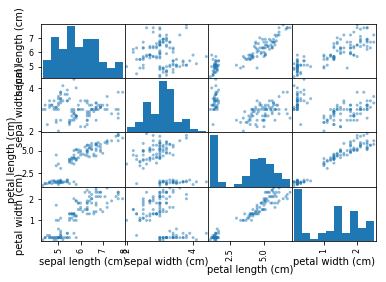

In [26]:
grr = pd.scatter_matrix(iris_df) #Эт по умолчанию

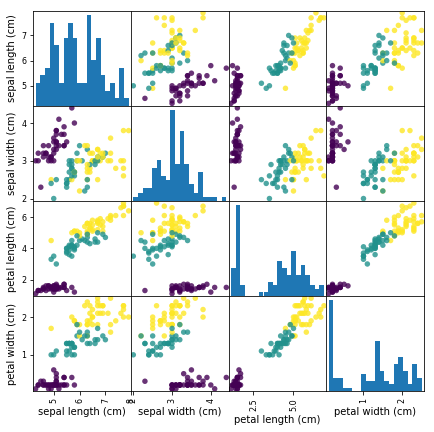

In [47]:
# c отвечает за раскраску
# s отвечает за размер маркеров
# alpha - 
grr = pd.plotting.scatter_matrix(iris_df, c= y_train, figsize=(7,7), 
                                 marker='o', hist_kwds={'bins':20}, s=30, alpha = 0.8) #Эт по-людски

In [48]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)

In [49]:
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [52]:
X_new = np.array([[5, 2.9, 1, 0.2]]) #записано в двумерный массив, т.к. sklearn работает только с двумерными массивами

In [56]:
prediction = knn.predict(X_new)
iris_ds['target_names'][prediction]

array(['setosa'], dtype='<U10')

In [57]:
prediction

array([0])

In [59]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [62]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test))) #типа среднее из булева массива

Правильность на тестовом наборе: 0.97
